<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/14_Stochastic_Gradient_Descent_vs_Batch_Gradient_Descent_vs_Mini_Batch_Gradient_Descent_DL_eg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
import seaborn as sn
import io

In [4]:
uploaded = files.upload()

Saving 14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv to 14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv" with length 250 bytes


In [6]:
uploaded

{'14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv': b'area,bedrooms,price\r\n1056,2,39.07\r\n2600,4,120\r\n1440,3,62\r\n1521,3,75\r\n1200,2,51\r\n1170,2,38\r\n2732,4,135\r\n3300,4,155\r\n1310,3,50\r\n3700,5,167\r\n1800,3,82\r\n2785,4,140\r\n1000,2,38\r\n1100,2,40\r\n2250,3,101\r\n1175,2,42\r\n1180,3,48\r\n1540,3,60\r\n2770,3,102\r\n800,1,32\r\n'}

In [8]:
df = pd.read_csv(io.StringIO(uploaded['14.Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent_DL.csv'].decode('utf-8')))
df.sample(5)
#here u can see that the scale here is much of area as compare to scale of bedrooms
#So 1st we r going to scaling


,area,bedrooms,price
3,1521,3,75.00
18,2770,3,102.00
5,1170,2,38.00
0,1056,2,39.07
11,2785,4,140.00


In [9]:
#So when we scaling the ML model perform great
#So implement the SDG and then implementing BGD in plane python
#So plane python means min max scaling 
#So use min max scaling import sklearn preprocessing
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X
#it bring them the scaling from 0 to 1

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [11]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [14]:
np.random.permutation(20)

array([ 2, 14, 10, 13,  4, 16,  5, 11,  1, 15,  7,  3, 12,  9,  0,  6,  8,
       19, 17, 18])

In [17]:
#now next step to implement the BGD
def mini_batch_gradient_descent(X, y_true, epochs=100, batch_size =5, learning_rate = 0.01):

  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))  #array([1., 1.]) w1 and w2
  b = 0
  total_samples = X.shape[0]

  if batch_size > total_samples:
    batch_size = total_samples
  cost_list = []
  epoch_list = []

  num_batches = int(total_samples/batch_size)

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)
    X_tmp = X[random_indices]
    y_tmp = y_true[random_indices]
        
    for j in range(0,total_samples,batch_size):
      Xj = X_tmp[j:j+batch_size]
      yj = y_tmp[j:j+batch_size]
      y_predicted = np.dot(w, Xj.T) + b

      w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
      b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad
                
      cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
      if i%10==0:
        cost_list.append(cost)
        epoch_list.append(i)
        
  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.70990834, 0.67805602]), -0.233337473823017, 0.008380459842036473)

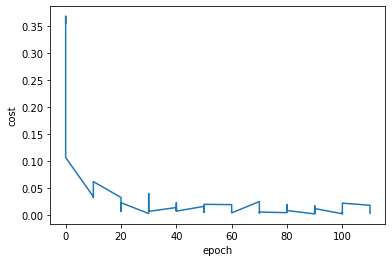

In [18]:

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)


In [19]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.63803600641555

In [20]:
predict(1000,2,w,b)

29.99332314101239

In [21]:

predict(1500,3,w,b)

69.40144241092301